In [1]:
import pandas as pd
from scipy.stats import trim_mean
import numpy as np

In [2]:
# importing the csv file 
df = pd.read_csv("weather_forecast_data.csv")
df.head()                                          # printing the head of the file 

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [68]:
# let's do the statistical analysis on all numerical columns present in the dataset 

# Estimates of location 
class Locality:
    def mean(self,column):
        tot = 0
        n = len(df[column])
        for i in df[column]:
            tot += i
        return tot/n
    
    def trimmed_mean(self,column,p):
        if p >= 1 and p < 50:
            n = len(df[column])
            p = int(n*(p/100))
            tot = 0
            arr = np.array(df[column])
            arr.sort()
            for i in range(p+1,n-p):
                tot += arr[i]
            return (tot/ (n-(2*p)))
        else:
            return "Please enter value of p less than 50 and greater than 1"
        
    def trimmed_mean2(self,column,trim_val = 0.2):
        return trim_mean(df[column],trim_val)
        
    def median(self,column):
        arr = np.array(df[column])
        arr.sort()
        n = len(arr)
        if n % 2 != 0:                                            # odd case
            return arr[(n+1)//2]
        else:                                                     # even case
            return ((arr[(n//2)] + arr[(n//2)+1])/2)
    
    def allEstimates(self,column):                               # following function takes column as input and returns mean, trimmed mean, and median of the data 
        print(column)
        print('-'*20)
        print("Mean         :", self.mean(column))
        print("Trimmed Mean :", self.trimmed_mean2(column))
        print("Median       :", self.median(column))


In [74]:
loc = Locality()
print(loc.allEstimates('Humidity'))

Humidity
--------------------
Mean         : 64.3470944576354
Trimmed Mean : 64.09376300585896
Median       : 63.954295827581085
None


In [72]:
# Estimates of variability

class Variability:
    # Mean absolute deviation/manhattan norm/ l1 norm 
    def mad(self,colname):
        mean_val = df[colname].mean()                                     # calculating the mean value
        length = len(df[colname])                                         # length of the feature
        tot = 0                                                           # creating a variable and initialising the value to 0 
        for x in df[colname]:                                             # loop through the values of that column
            tot += abs(x-mean_val)                                        # x-mean_val --> mean deviation 
        return round(tot/length,3)                                        # returning the rounded value
        
    # using numpy calculate the mean absolute deviation 
    def mad2(self,colname):
        mean_ = np.mean(df[colname])                                      # taking the mean of pd.core.series.Series
        abs_deviation = np.abs(df[colname] - mean_)                       # converting to positive values 
        mad2 = round(np.mean(abs_deviation),3)                            # calculating the mean deviation and rounding to 3 digit
        return mad2                                                       # returning the value
    
    # variance/mean squared error  
    def variance(self,colName):
        n = len(df[colName])                                             # calculating the length of the column
        tot = 0                                                          # initialised variable with 0
        mean_val = df[colName].mean()                                    # calculating the mean value for that column
        for x in df[colName]:                                            # loop
            tot += (x - mean_val)**2                                     # (x - mean_val)**2 --> squared mean deviation 
        return round(tot/(n-1),3)                                        # returing the variance
        
    def variance2(self,colName):
        return round(df[colName].var() ,3)                               # in-built function to calculate the variance   
    
    # standard deviation/ l2 norm / euclidean norm 
    def stdDev(self,colName):                                  
        return round(self.variance(colName)**0.5,6)                      # calling the variance function to take the square root of it                                        
    
    def stdDev2(self,colName):
        return round(df[colName].std(),6)                                # in-built standard deviation calling function 

    # range
    def range_(self,colname):
        return round(min(df[colname]),6),round(max(df[colname]),6)       # return minimum and maximum value of that column

    # inter quartile range 
    def interQuartilerange(self,colname):
        return df[colname].quantile(0.75) - df[colname].quantile(0.25)   # returns the difference between the 75 and 25 quantile value

    def quantile(self,colname,val = 0.01):
        if val > 0 and val < 1:                                          # checks if the value greater than 0 and less than 1 or not 
            return df[colname].quantile(val)                             # return quantile value already initialised to 0.5 to find the median 
        else:                                                            # else throws an error message 
            return "please check the value should be less than 1 and greater 0"

    def displayValue(self,colname):
        print(colname)
        print('-'*50)
        print('Mean absolute deviation :', self.mad(colname))
        print('Variance                :', self.variance(colname))
        print('Standard Deviation      :', self.stdDev(colname))
        print('range                   :', self.range_(colname))
        print('Interquantile range     :', self.interQuartilerange(colname))
        print('Quantile                :', self.quantile(colname))
    

In [73]:
stat = Variability()
stat.displayValue('Wind_Speed')

Wind_Speed
--------------------------------------------------
Mean absolute deviation : 5.012
Variance                : 33.412
Standard Deviation      : 5.780311
range                   : (0.009819, 19.999132)
Interquantile range     : 10.186498793786143
Quantile                : 0.1417012330694801


In [76]:
# data distribution 

import matplotlib.pyplot as plt 
import seaborn as sns 

sns.boxplot?

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

See the :ref:`tutorial <categorical_tutorial>` for more i

In [82]:
def plotbox(colname):
    plt.title(f'Box Plot of {colname}')
    sns.boxplot(df[colname])
    

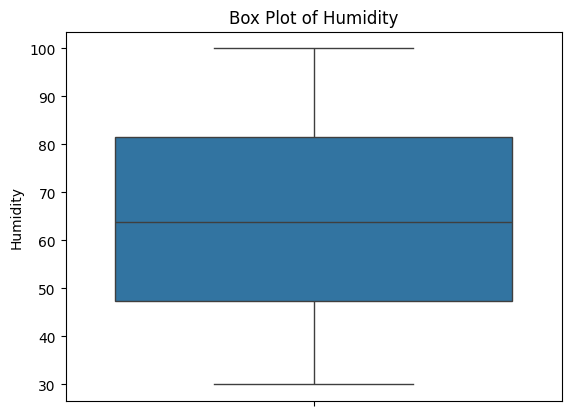

In [83]:
plotbox('Humidity')

In [ ]:
T